`ya_glm` lets you combine a wide array of GLMs (e.g. linear regression, logistic regression, multiple response linear regression, etc) with a wide array of penalties (e.g. Lasso, ElasticNet, Group Lasso, L1 to L2 norm, nuclear norm, etc). We can programaticlaly generate estimators with any combination of GLM loss and penalty.

`ya_glm` also lets you swap in your favorite GLM solver. Here we use celer for linear regression.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ya_glm.toy_data import sample_sparse_lin_reg, sample_sparse_log_reg
from ya_glm.estimator_getter import get_pen_glm, get_fcp_model

Text(0.5, 1.0, 'True coefficient')

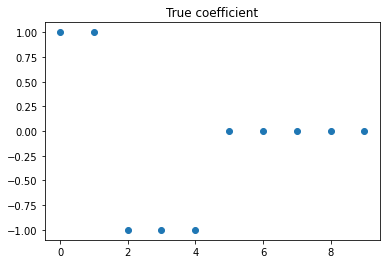

In [2]:
# sample some linear regression data
X, y, coef, intercept = sample_sparse_lin_reg(n_samples=100, n_features=10, n_nonzero=5,
                                              random_state=1)

plt.scatter(np.arange(len(coef)), coef)
plt.title("True coefficient")

# Programatically generating estimators

You can programatically create GLM loss + peanlty estimators

In [3]:
# construct an Estimator with a corresponding
# cross-validation estimator
Est, EstCV = get_pen_glm(loss_func='lin_reg',
                         penalty='lasso',
                         backend='fista')

est = Est(pen_val=1).fit(X, y) # single fit
%time est_cv = EstCV().fit(X, y) # cross validation

# folded concave 
# Est, EstCV = get_fcp_model(loss_func='linear_regression', backend='fista')

CPU times: user 687 ms, sys: 8.2 ms, total: 695 ms
Wall time: 697 ms


# Celer backend for linear regression

In [4]:
Est, EstCV = get_pen_glm(loss_func='lin_reg', penalty='lasso',
                         backend='celer')

%time est_cv = EstCV().fit(X, y) # celer is faster than FISTA in higher dimensions!

CPU times: user 1.33 s, sys: 35.3 ms, total: 1.36 s
Wall time: 1.38 s


# Logistic Regression

We can apply all our favorite penalties to logistic regression!

In [5]:
# sample some logistic regression data
# same coefficient as above
X, y, probs, coef, intercept = sample_sparse_log_reg(n_samples=100, n_features=10, n_nonzero=5,
                                                     random_state=1)

In [6]:
# Lasso penalty
Est, EstCV = get_pen_glm(loss_func='log_reg', penalty='lasso')
est = EstCV().fit(X, y)
print('Lasso L2 to truth', np.linalg.norm(est.best_estimator_.coef_ - coef))


# ElasticNet
Est, EstCV = get_pen_glm(loss_func='log_reg', penalty='lasso_enet')
est = EstCV().fit(X, y)
print('ENet L2 to truth', np.linalg.norm(est.best_estimator_.coef_ - coef))


# User specified groups lasso
groups = [range(5), range(5, 10)]
Est, EstCV = get_pen_glm(loss_func='log_reg', penalty='group_lasso')
est = EstCV(groups=groups).fit(X, y)
print('Group Lasso L2 to truth', np.linalg.norm(est.best_estimator_.coef_ - coef))


# concave penalty
Est, EstCV = get_fcp_model(loss_func='log_reg')
est = EstCV().fit(X, y)
print('SCAD L2 to truth', np.linalg.norm(est.best_estimator_.coef_ - coef))

Lasso L2 to truth 1.1222397223387948
ENet L2 to truth 0.9661888417457567
Group Lasso L2 to truth 1.0554558614871843
SCAD L2 to truth 0.8400704078733395


# Multiple response linear regression

For multiple response linear regression we get a few additional penalties such as nuclear norm and the Row Lasso (L1 to L2 norm).

<AxesSubplot:>

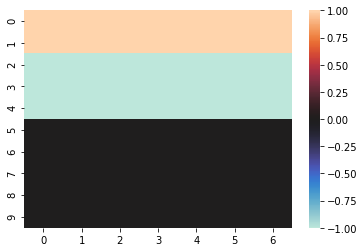

In [7]:
# multiple response linear regression with row sparsity
# not this coefficent matrix is also low rank
X, y, coef, intercept = sample_sparse_lin_reg(n_samples=100, n_features=10, n_nonzero=5,
                                              n_responses=7, random_state=1)

sns.heatmap(coef, center=0)

In [8]:
# Lasso penalty
Est, EstCV = get_pen_glm(loss_func='lin_reg_mr', penalty='lasso')
est = EstCV().fit(X, y)
print('Entrywise Lasso L2 to truth', np.linalg.norm(est.best_estimator_.coef_ - coef))


Est, EstCV = get_pen_glm(loss_func='lin_reg_mr', penalty='row_lasso')
est = EstCV().fit(X, y)
print('Row lasso L2 to truth', np.linalg.norm(est.best_estimator_.coef_ - coef))


Est, EstCV = get_pen_glm(loss_func='lin_reg_mr', penalty='nuclear_norm')
est = EstCV().fit(X, y)
print('Nuclear norm L2 to truth', np.linalg.norm(est.best_estimator_.coef_ - coef))

Entrywise Lasso L2 to truth 0.9119182250946589
Row lasso L2 to truth 0.8684962588854993
Nuclear norm L2 to truth 0.709980584679661
